## Aim 

The aim of this collab is to create a Autocomplete Language Model . 
We would be using Language Models to generate the probabilities of the sequences and the sentences  .

For example :
  prob of the sentence "I am awesome" would be higher than say "I awesome am" , Which coule help us predict the next possible word based on the running sequence.

We would be using N-grams method, which would be used in Machine translation and speech recognition.

Following are the steps involved in the model : 
* Preprocessing of the data .
* Developing the Language Model.
* Evaluate the model using the persplexity score.
* Evaluate sentences using the model .

In [ ]:
import math
import random
import numpy as np
import pandas as pd
import nltk
nltk.data.path.append('.')

In [ ]:
# Mount the drive to access the relevant data 

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
with open("/content/gdrive/My Drive/en_US.twitter.txt", "r") as f:
    data = f.read()
print("Data type:", type(data))
print("Number of letters:", len(data))
print("First 300 letters of the data")
print("-------")
display(data[0:300])
print("-------")

print("Last 300 letters of the data")
print("-------")
display(data[-300:])
print("-------")

Data type: <class 'str'>
Number of letters: 3335477
First 300 letters of the data
-------


"How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.\nWhen you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.\nthey've decided its more fun if I don't.\nSo Tired D; Played Lazer Tag & Ran A "

-------
Last 300 letters of the data
-------


"ust had one a few weeks back....hopefully we will be back soon! wish you the best yo\nColombia is with an 'o'...“: We now ship to 4 countries in South America (fist pump). Please welcome Columbia to the Stunner Family”\n#GutsiestMovesYouCanMake Giving a cat a bath.\nCoffee after 5 was a TERRIBLE idea.\n"

-------


In [ ]:
data

'How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.\nWhen you meet someone special... you\'ll know. Your heart will beat more rapidly and you\'ll smile for no reason.\nthey\'ve decided its more fun if I don\'t.\nSo Tired D; Played Lazer Tag & Ran A LOT D; Ughh Going To Sleep Like In 5 Minutes ;)\nWords from a complete stranger! Made my birthday even better :)\nFirst Cubs game ever! Wrigley field is gorgeous. This is perfect. Go Cubs Go!\ni no! i get another day off from skool due to the wonderful snow (: and THIS wakes me up...damn thing\nI\'m coo... Jus at work hella tired r u ever in cali\nThe new sundrop commercial ...hehe love at first sight\nwe need to reconnect THIS WEEK\nI always wonder how the guys on the auctions shows learned to talk so fast!? all I hear is djsosnekspqnslanskam.\nDammnnnnn what a catch\nsuch a great picture! The green shirt totally brings out your eyes!\nDesk put together, room all set up. Oh boy, oh 

## Preprocess the data 

Preprocess with the following step 

* Split data into sentences using "\n" as the delimiter.
* Split each sentence into tokens. Note that in this assignment we use "token" and "words" interchangeably.
* Assign sentences into train or test sets.
* Find tokens that appear at least N times in the training data.
* Replace tokens that appear less than N times by <unk>


No **validation dataset** is used for simplicity 

In [ ]:
def split_to_sentences(data):
    """
    Split data by linebreak "\n"
    
    Args:
        data: str
    
    Returns:
        A list of sentences
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    sentences = data.split("\n")
    ### END CODE HERE ###
    
    # Additional clearning (This part is already implemented)
    # - Remove leading and trailing spaces from each sentence
    # - Drop sentences if they are empty strings.
    sentences = [s.strip() for s in sentences]
    sentences = [s for s in sentences if len(s) > 0]
    
    return sentences    

In [ ]:
x = """
I have a pen.\nI have an apple. \nAh\nApple pen.\n
"""


split_to_sentences(x)

['I have a pen.', 'I have an apple.', 'Ah', 'Apple pen.']

## Tokenization

* tokenize the list and convert the list of words into lower case  .



In [ ]:
def tokenize_sentences(sentences):
    """
    Tokenize sentences into tokens (words)
    
    Args:
        sentences: List of strings
    
    Returns:
        List of lists of tokens
    """
    
    # Initialize the list of lists of tokenized sentences
    tokenized_sentences = []
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Go through each sentence
    for sentence in sentences:
        
        # Convert to lowercase letters
        sentence = sentence.lower()
        if sentence[-1] == '.':
          sentence = sentence[:-1]
        
        # Convert into a list of words
        tokenized = sentence.split()
        tokenized.append(".")
        # append the list of words to the list of lists
        tokenized_sentences.append(tokenized)
    
    ### END CODE HERE ###
    
    return tokenized_sentences

In [ ]:
sentences = ["Sky is blue.", "Leaves are green.", "Roses are red."]
tokenize_sentences(sentences)

[['sky', 'is', 'blue', '.'],
 ['leaves', 'are', 'green', '.'],
 ['roses', 'are', 'red', '.']]

## Combining the preprocessing functions 

* Now we would split the data into sentences .
* Convert into lower case and tokenize the sentences .



In [ ]:
def get_tokenized_data(data):
    """
    Make a list of tokenized sentences
    
    Args:
        data: String
    
    Returns:
        List of lists of tokens
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Get the sentences by splitting up the data
    sentences = split_to_sentences(data)
    
    # Get the list of lists of tokens by tokenizing the sentences
    tokenized_sentences = tokenize_sentences(sentences)
    
    ### END CODE HERE ###
    
    return tokenized_sentences

In [ ]:
x = "Sky is blue.\nLeaves are green\nRoses are red."
get_tokenized_data(x)

[['sky', 'is', 'blue', '.'],
 ['leaves', 'are', 'green', '.'],
 ['roses', 'are', 'red', '.']]

## Split into train-test split 


Split the dataSet into train and test data .


In [ ]:
tokenized_data = get_tokenized_data(data)
random.seed(87)
random.shuffle(tokenized_data)

train_size = int(len(tokenized_data) * 0.8)
train_data = tokenized_data[0:train_size]
test_data = tokenized_data[train_size:]

In [ ]:
print("{} data are split into {} train and {} test set".format(
    len(tokenized_data), len(train_data), len(test_data)))

print("First training sample:")
print(train_data[0])
      
print("First test sample")
print(test_data[0])

47961 data are split into 38368 train and 9593 test set
First training sample:
['i', 'personally', 'would', 'like', 'as', 'our', 'official', 'glove', 'of', 'the', 'team', 'local', 'company', 'and', 'quality', 'production', '.']
First test sample
['that', 'picture', 'i', 'just', 'seen', 'whoa', 'dere', '!!', '>>>>>>>', '.']


In [ ]:
def count_words(tokenized_sentences):
    """
    Count the number of word appearence in the tokenized sentences
    
    Args:
        tokenized_sentences: List of lists of strings
    
    Returns:
        dict that maps word (str) to the frequency (int)
    """
        
    word_counts = {}
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Loop through each sentence
    for sentence in tokenized_sentences: # complete this line
        
        # Go through each token in the sentence
        for token in sentence: # complete this line

            # If the token is not in the dictionary yet, set the count to 1
            if token not in word_counts.keys(): # complete this line
                word_counts[token] = 1
            
            # If the token is already in the dictionary, increment the count by 1
            else:
                word_counts[token] += 1

    ### END CODE HERE ###
    
    return word_counts

In [ ]:
tokenized_sentences = [['sky', 'is', 'blue', '.'],
                       ['leaves', 'are', 'green', '.'],
                       ['roses', 'are', 'red', '.']]
count_words(tokenized_sentences)

{'sky': 1,
 'is': 1,
 'blue': 1,
 '.': 3,
 'leaves': 1,
 'are': 2,
 'green': 1,
 'roses': 1,
 'red': 1}

## Out of vocabulary sentences 
* This 'new' word is called an 'unknown word', or out of vocabulary (OOV) words.
* The percentage of unknown words in the test set is called the OOV rate.

we would introduce a special token '<unk>' to incorporate the missing word problem .


In [ ]:
def get_words_with_nplus_frequency(tokenized_sentences, count_threshold):
    """
    Find the words that appear N times or more
    
    Args:
        tokenized_sentences: List of lists of sentences
        count_threshold: minimum number of occurrences for a word to be in the closed vocabulary.
    
    Returns:
        List of words that appear N times or more
    """
    # Initialize an empty list to contain the words that
    # appear at least 'minimum_freq' times.
    closed_vocab = []
    
    # Get the word couts of the tokenized sentences
    # Use the function that you defined earlier to count the words
    word_counts = count_words(tokenized_sentences)
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # for each word and its count
    for word, cnt in word_counts.items(): # complete this line
        
        # check that the word's count
        # is at least as great as the minimum count
        if cnt >= count_threshold:
            
            # append the word to the list
            closed_vocab.append(word)
    ### END CODE HERE ###
    
    return closed_vocab

In [ ]:
tokenized_sentences = [['sky', 'is', 'blue', '.'],
                       ['leaves', 'are', 'green', '.'],
                       ['roses', 'are', 'red', '.']]
tmp_closed_vocab = get_words_with_nplus_frequency(tokenized_sentences, count_threshold=2)
print(f"Closed vocabulary:")
print(tmp_closed_vocab)

Closed vocabulary:
['.', 'are']


In [ ]:
def replace_oov_words_by_unk(tokenized_sentences, vocabulary, unknown_token="<unk>"):
    """
    Replace words not in the given vocabulary with '<unk>' token.
    
    Args:
        tokenized_sentences: List of lists of strings
        vocabulary: List of strings that we will use
        unknown_token: A string representing unknown (out-of-vocabulary) words
    
    Returns:
        List of lists of strings, with words not in the vocabulary replaced
    """
    
    # Place vocabulary into a set for faster search
    vocabulary = set(vocabulary)
    
    # Initialize a list that will hold the sentences
    # after less frequent words are replaced by the unknown token
    replaced_tokenized_sentences = []
    
    # Go through each sentence
    for sentence in tokenized_sentences:
        
        # Initialize the list that will contain
        # a single sentence with "unknown_token" replacements
        replaced_sentence = []
        ### START CODE HERE (Replace instances of 'None' with your code) ###

        # for each token in the sentence
        for token in sentence: # complete this line
            
            # Check if the token is in the closed vocabulary
            if token in vocabulary: # complete this line
                # If so, append the word to the replaced_sentence
                replaced_sentence.append(token)
            else:
                # otherwise, append the unknown token instead
                replaced_sentence.append(unknown_token)
        ### END CODE HERE ###
        
        # Append the list of tokens to the list of lists
        replaced_tokenized_sentences.append(replaced_sentence)
        
    return replaced_tokenized_sentences

In [ ]:
tokenized_sentences = [["dogs", "run"], ["cats", "sleep"]]
vocabulary = ["dogs", "sleep"]
tmp_replaced_tokenized_sentences = replace_oov_words_by_unk(tokenized_sentences, vocabulary)
print(f"Original sentence:")
print(tokenized_sentences)
print(f"tokenized_sentences with less frequent words converted to '<unk>':")
print(tmp_replaced_tokenized_sentences)

Original sentence:
[['dogs', 'run'], ['cats', 'sleep']]
tokenized_sentences with less frequent words converted to '<unk>':
[['dogs', '<unk>'], ['<unk>', 'sleep']]


In [ ]:
def preprocess_data(train_data, test_data, count_threshold):
    """
    Preprocess data, i.e.,
        - Find tokens that appear at least N times in the training data.
        - Replace tokens that appear less than N times by "<unk>" both for training and test data.        
    Args:
        train_data, test_data: List of lists of strings.
        count_threshold: Words whose count is less than this are 
                      treated as unknown.
    
    Returns:
        Tuple of
        - training data with low frequent words replaced by "<unk>"
        - test data with low frequent words replaced by "<unk>"
        - vocabulary of words that appear n times or more in the training data
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # Get the closed vocabulary using the train data
    vocabulary = get_words_with_nplus_frequency(train_data, count_threshold)
    
    # For the train data, replace less common words with "<unk>"
    train_data_replaced = replace_oov_words_by_unk(train_data, vocabulary)
    
    # For the test data, replace less common words with "<unk>"
    test_data_replaced = replace_oov_words_by_unk(test_data, vocabulary)
    
    ### END CODE HERE ###
    return train_data_replaced, test_data_replaced, vocabulary

In [ ]:
tmp_train = [['sky', 'is', 'blue', '.'],
     ['leaves', 'are', 'green']]
tmp_test = [['roses', 'are', 'red', '.']]

tmp_train_repl, tmp_test_repl, tmp_vocab = preprocess_data(tmp_train, 
                                                           tmp_test, 
                                                           count_threshold = 1)

print("tmp_train_repl")
print(tmp_train_repl)
print()
print("tmp_test_repl")
print(tmp_test_repl)
print()
print("tmp_vocab")
print(tmp_vocab)

tmp_train_repl
[['sky', 'is', 'blue', '.'], ['leaves', 'are', 'green']]

tmp_test_repl
[['<unk>', 'are', '<unk>', '.']]

tmp_vocab
['sky', 'is', 'blue', '.', 'leaves', 'are', 'green']


In [ ]:
minimum_freq = 2
train_data_processed, test_data_processed, vocabulary = preprocess_data(train_data, 
                                                                        test_data, 
                                                                        minimum_freq)

In [ ]:
print("First preprocessed training sample:")
print(train_data_processed[0])
print()
print("First preprocessed test sample:")
print(test_data_processed[0])
print()
print("First 10 vocabulary:")
print(vocabulary[0:10])
print()
print("Size of vocabulary:", len(vocabulary))

First preprocessed training sample:
['i', 'personally', 'would', 'like', 'as', 'our', 'official', '<unk>', 'of', 'the', 'team', 'local', 'company', 'and', 'quality', 'production', '.']

First preprocessed test sample:
['that', 'picture', 'i', 'just', 'seen', 'whoa', '<unk>', '!!', '<unk>', '.']

First 10 vocabulary:
['i', 'personally', 'would', 'like', 'as', 'our', 'official', 'of', 'the', 'team']

Size of vocabulary: 19420


## Develop an N-gram based Lnaguage Model

* Assume prob of next word depends on the previous N-grams .
* We would be using conditional probability , For instance, the prob that W(i) follows W(i-1) , W(i-2) ---- W(i-n) would be 
      P(W(i)/(W(i-1),W(i-2),W(i-3),...W(i-n)) where n= N-gram coefficient .

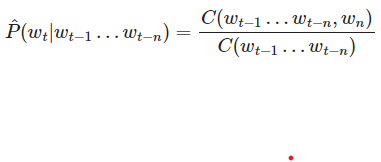


Now we would be evaluating the N-grams from the corpus 

When computing the counts for n-grams, prepare the sentence beforehand by prepending n-1 starting markers  to indicate the beginning of the sentence.

* For example, in the bi-gram model (N=2), a sequence with two start tokens \<s> should predict the first word of a sentence.
* So, if the sentence is "I like food", modify it to be " \<s>\<s> I like food".
* Also prepare the sentence for counting by appending an end token "\<e>" so that the model can predict when to finish a sentence.


* The key of each key-value pair in the dictionary is a tuple of n words (and not a list)
* The value in the key-value pair is the number of occurrences.
* The reason for using a tuple as a key instead of a list is because a list in Python is a mutable object (it can be changed after it is first created). A tuple is "immutable", so it cannot be altered after it is first created. This makes a tuple suitable as a data type for the key in a dictionary.


In [ ]:
# define a function to count the N-grams 

def count_n_grams(data, n, start_token='<s>', end_token = '<e>'):
    """
    Count all n-grams in the data
    
    Args:
        data: List of lists of words
        n: number of words in a sequence
    
    Returns:
        A dictionary that maps a tuple of n-words to its frequency
    """
    
    # Initialize dictionary of n-grams and their counts
    n_grams = {}

    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Go through each sentence in the data
    for sentence in data: # complete this line
        
        # prepend start token n times, and  append <e> one time
        sentence =  [start_token]*n + sentence + [end_token]
        
        # convert list to tuple
        # So that the sequence of words can be used as
        # a key in the dictionary
        sentence = tuple(sentence)
        
        # Use 'i' to indicate the start of the n-gram
        # from index 0
        # to the last index where the end of the n-gram
        # is within the sentence.
        
        for i in range(len(sentence)-n+1): # complete this line

            # Get the n-gram from i to i+n
            n_gram = sentence[i:i+n]

            # check if the n-gram is in the dictionary
            if n_gram in n_grams.keys(): # complete this line
            
                # Increment the count for this n-gram
                n_grams[n_gram] += 1
            else:
                # Initialize this n-gram count to 1
                n_grams[n_gram] = 1
    
            ### END CODE HERE ###
    return n_grams

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
print("Uni-gram:")
print(count_n_grams(sentences, 1))
print("Bi-gram:")
print(count_n_grams(sentences, 2))

Uni-gram:
{('<s>',): 2, ('i',): 1, ('like',): 2, ('a',): 2, ('cat',): 2, ('<e>',): 2, ('this',): 1, ('dog',): 1, ('is',): 1}
Bi-gram:
{('<s>', '<s>'): 2, ('<s>', 'i'): 1, ('i', 'like'): 1, ('like', 'a'): 2, ('a', 'cat'): 2, ('cat', '<e>'): 2, ('<s>', 'this'): 1, ('this', 'dog'): 1, ('dog', 'is'): 1, ('is', 'like'): 1}


## Estimate the prob of current word given prior N words .
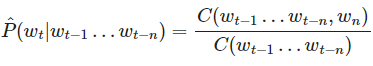

This formula doesn't work when a count of an n-gram is zero..

* Suppose we encounter an n-gram that did not occur in the training data.
* Then, the equation (2) cannot be evaluated (it becomes zero divided by zero).

A way to handle this case to use K-smoothing 

K smoothing adds the a positive constant K to numerator and K*|v| to the denominator, this would make the probability = 1/|V| for cases where the count of that particular n-gram == 0 .


In [ ]:
def estimate_probability(word, previous_n_gram, 
                         n_gram_counts, n_plus1_gram_counts, vocabulary_size, k=1.0):
    """
    Estimate the probabilities of a next word using the n-gram counts with k-smoothing
    
    Args:
        word: next word
        previous_n_gram: A sequence of words of length n
        n_gram_counts: Dictionary of counts of n-grams
        n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
        vocabulary_size: number of words in the vocabulary
        k: positive constant, smoothing parameter
    
    Returns:
        A probability
    """
    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram)
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Set the denominator
    # If the previous n-gram exists in the dictionary of n-gram counts,
    # Get its count.  Otherwise set the count to zero
    # Use the dictionary that has counts for n-grams
    previous_n_gram_count = n_gram_counts.get(previous_n_gram,0)
        
    # Calculate the denominator using the count of the previous n gram
    # and apply k-smoothing
    denominator = previous_n_gram_count + vocabulary_size * k

    # Define n plus 1 gram as the previous n-gram plus the current word as a tuple
    n_plus1_gram = previous_n_gram + (word,)
  
    # Set the count to the count in the dictionary,
    # otherwise 0 if not in the dictionary
    # use the dictionary that has counts for the n-gram plus current word
    n_plus1_gram_count =n_plus1_gram_counts.get(n_plus1_gram,0)
        
    # Define the numerator use the count of the n-gram plus current word,
    # and apply smoothing
    numerator = n_plus1_gram_count + k

    # Calculate the probability as the numerator divided by denominator
    probability = numerator / denominator
    
    ### END CODE HERE ###
    
    return probability

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))


unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)
tmp_prob = estimate_probability("cat", "a", unigram_counts, bigram_counts, len(unique_words), k=1)

print(f"The estimated probability of word 'cat' given the previous n-gram 'a' is: {tmp_prob:.4f}")

The estimated probability of word 'cat' given the previous n-gram 'a' is: 0.3333


## Estimate probabilities of all the words 

The function loops over all the words in the vocabulary to calculate probabilities of all possible words .


In [ ]:
def estimate_probabilities(previous_n_gram, n_gram_counts, n_plus1_gram_counts, vocabulary, k=1.0):
    """
    Estimate the probabilities of next words using the n-gram counts with k-smoothing
    
    Args:
        previous_n_gram: A sequence of words of length n
        n_gram_counts: Dictionary of counts of (n+1)-grams
        n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
        vocabulary: List of words
        k: positive constant, smoothing parameter
    
    Returns:
        A dictionary mapping from next words to the probability.
    """
    
    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram)
    
    # add <e> <unk> to the vocabulary
    # <s> is not needed since it should not appear as the next word
    vocabulary = vocabulary + ["<e>", "<unk>"]
    vocabulary_size = len(vocabulary)
    
    probabilities = {}
    for word in vocabulary:
        probability = estimate_probability(word, previous_n_gram, 
                                           n_gram_counts, n_plus1_gram_counts, 
                                           vocabulary_size, k=k)
        probabilities[word] = probability

    return probabilities

In [ ]:
# test your code
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)
estimate_probabilities("a", unigram_counts, bigram_counts, unique_words, k=1)

{'this': 0.09090909090909091,
 'dog': 0.09090909090909091,
 'is': 0.09090909090909091,
 'cat': 0.2727272727272727,
 'i': 0.09090909090909091,
 'a': 0.09090909090909091,
 'like': 0.09090909090909091,
 '<e>': 0.09090909090909091,
 '<unk>': 0.09090909090909091}

In [ ]:
trigram_counts = count_n_grams(sentences, 3)
estimate_probabilities(["<s>", "<s>"], bigram_counts, trigram_counts, unique_words, k=1)

{'this': 0.18181818181818182,
 'dog': 0.09090909090909091,
 'is': 0.09090909090909091,
 'cat': 0.09090909090909091,
 'i': 0.18181818181818182,
 'a': 0.09090909090909091,
 'like': 0.09090909090909091,
 '<e>': 0.09090909090909091,
 '<unk>': 0.09090909090909091}

## Count the probability matrices 

The N-grams computed above are sufficient to create the N-gram matrix , now we would be creating this matrix .

* It can be more intuitive to present them as count or probability matrices.
* The functions defined in the next cells return count or probability matrices.
* This function is provided for you.

In [ ]:
def make_count_matrix(n_plus1_gram_counts, vocabulary):
    # add <e> <unk> to the vocabulary
    # <s> is omitted since it should not appear as the next word
    vocabulary = vocabulary + ["<e>", "<unk>"]
    
    

    # obtain unique n-grams
    n_grams = []
    for n_plus1_gram in n_plus1_gram_counts.keys():
        n_gram = n_plus1_gram[0:-1]
        n_grams.append(n_gram)
    n_grams = list(set(n_grams))
    
    

    # mapping from n-gram to row
    row_index = {n_gram:i for i, n_gram in enumerate(n_grams)}
    # mapping from next word to column
    col_index = {word:j for j, word in enumerate(vocabulary)}
    
    

    nrow = len(n_grams)
    ncol = len(vocabulary)
    count_matrix = np.zeros((nrow, ncol))
    for n_plus1_gram, count in n_plus1_gram_counts.items():
        n_gram = n_plus1_gram[0:-1]
        word = n_plus1_gram[-1]
        if word not in vocabulary:
            continue
        i = row_index[n_gram]
        j = col_index[word]
        count_matrix[i, j] = count
    
    count_matrix = pd.DataFrame(count_matrix, index=n_grams, columns=vocabulary)
    return count_matrix

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
bigram_counts = count_n_grams(sentences, 2)

print('bigram counts')
display(make_count_matrix(bigram_counts, unique_words))

bigram counts


,this,dog,is,cat,i,a,like,<e>,<unk>
"(is,)",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(cat,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
"(dog,)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(i,)",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(<s>,)",1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(this,)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(a,)",0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
"(like,)",0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [ ]:
print('\ntrigram counts')
trigram_counts = count_n_grams(sentences, 3)
display(make_count_matrix(trigram_counts, unique_words))


trigram counts


,this,dog,is,cat,i,a,like,<e>,<unk>
"(<s>, i)",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(<s>, this)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(<s>, <s>)",1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(like, a)",0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
"(is, like)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(i, like)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(this, dog)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(a, cat)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
"(dog, is)",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now we would define a function that would find the probability of each words in a given n-gram and stores this in the matrix format . 

In [ ]:
def make_probability_matrix(n_plus1_gram_counts, vocabulary, k):
    count_matrix = make_count_matrix(n_plus1_gram_counts, unique_words)
    count_matrix += k
    prob_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    return prob_matrix

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
bigram_counts = count_n_grams(sentences, 2)
print("bigram probabilities")
display(make_probability_matrix(bigram_counts, unique_words, k=1))

bigram probabilities


,this,dog,is,cat,i,a,like,<e>,<unk>
"(is,)",0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000
"(cat,)",0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.272727,0.090909
"(dog,)",0.100000,0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
"(i,)",0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000
"(<s>,)",0.181818,0.090909,0.090909,0.090909,0.181818,0.090909,0.090909,0.090909,0.090909
"(this,)",0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
"(a,)",0.090909,0.090909,0.090909,0.272727,0.090909,0.090909,0.090909,0.090909,0.090909
"(like,)",0.090909,0.090909,0.090909,0.090909,0.090909,0.272727,0.090909,0.090909,0.090909


In [ ]:
print("trigram probabilities")
trigram_counts = count_n_grams(sentences, 3)
display(make_probability_matrix(trigram_counts, unique_words, k=1))

trigram probabilities


,this,dog,is,cat,i,a,like,<e>,<unk>
"(<s>, i)",0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000
"(<s>, this)",0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
"(<s>, <s>)",0.181818,0.090909,0.090909,0.090909,0.181818,0.090909,0.090909,0.090909,0.090909
"(like, a)",0.090909,0.090909,0.090909,0.272727,0.090909,0.090909,0.090909,0.090909,0.090909
"(is, like)",0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000
"(i, like)",0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000
"(this, dog)",0.100000,0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
"(a, cat)",0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.272727,0.090909
"(dog, is)",0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000


## Perplexity 

Now we would be using perplexity to evaluate the model performance on the test set. 
* Will create** Back-OFF** when needed .
* Perplexity is used as an evaluation metric of your language model.
* To calculate the the perplexity score of the test set on an n-gram model, use:
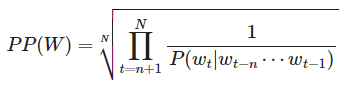

* Here **N** is the lenght of the sentence .
* n is the no. of words in the n gram .
* In math, the numbering starts at one and not zero.


**Now we would compute a Perplexity score given an N-gram matrix and a sentence.**



In [ ]:
def calculate_perplexity(sentence, n_gram_counts, n_plus1_gram_counts, vocabulary_size, k=1.0):
    """
    Calculate perplexity for a list of sentences
    
    Args:
        sentence: List of strings
        n_gram_counts: Dictionary of counts of (n+1)-grams
        n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
        vocabulary_size: number of unique words in the vocabulary
        k: Positive smoothing constant
    
    Returns:
        Perplexity score
    """
    # length of previous words
    n = len(list(n_gram_counts.keys())[0]) 
    
    # prepend <s> and append <e>
    sentence = ["<s>"] * n + sentence + ["<e>"]
    
    # Cast the sentence from a list to a tuple
    sentence = tuple(sentence)
    
    # length of sentence (after adding <s> and <e> tokens)
    N = len(sentence)
    
    # The variable p will hold the product
    # that is calculated inside the n-root
    # Update this in the code below
    product_pi = 1.0
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Index t ranges from n to N - 1, inclusive on both ends
    for t in range(n, N): # complete this line

        # get the n-gram preceding the word at position t
        n_gram = sentence[t-n:t]
        
        # get the word at position t
        word = sentence[t]
        # Estimate the probability of the word given the n-gram
        # using the n-gram counts, n-plus1-gram counts,
        # vocabulary size, and smoothing constant
        probability = estimate_probability(word,n_gram, n_gram_counts, n_plus1_gram_counts, len(unique_words), k=1)
        
        # Update the product of the probabilities
        # This 'product_pi' is a cumulative product 
        # of the (1/P) factors that are calculated in the loop
        product_pi *= 1/probability

    # Take the Nth root of the product
    perplexity = np.power(product_pi,1/N)
    
    ### END CODE HERE ### 
    return perplexity

In [ ]:
# test your code

sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)


perplexity_train1 = calculate_perplexity(sentences[0],
                                         unigram_counts, bigram_counts,
                                         len(unique_words), k=1.0)
print(f"Perplexity for first train sample: {perplexity_train1:.4f}")

test_sentence = ['i', 'like', 'a', 'dog']
perplexity_test = calculate_perplexity(test_sentence,
                                       unigram_counts, bigram_counts,
                                       len(unique_words), k=1.0)
print(f"Perplexity for test sample: {perplexity_test:.4f}")

Perplexity for first train sample: 2.8040
Perplexity for test sample: 3.9654


## Autocomplete System 

Now with all the modules implemented we would be creating the autocomplete system .

Compute probabilities for all possible next words and suggest the most likely one.

* This function also take an optional argument start_with, which specifies the first few letters of the next words.

In [ ]:
def suggest_a_word(previous_tokens, n_gram_counts, n_plus1_gram_counts, vocabulary, k=1.0, start_with=None):
    """
    Get suggestion for the next word
    
    Args:
        previous_tokens: The sentence you input where each token is a word. Must have length > n 
        n_gram_counts: Dictionary of counts of (n+1)-grams
        n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
        vocabulary: List of words
        k: positive constant, smoothing parameter
        start_with: If not None, specifies the first few letters of the next word
        
    Returns:
        A tuple of 
          - string of the most likely next word
          - corresponding probability
    """
    
    # length of previous words
    n = len(list(n_gram_counts.keys())[0]) 
    
    # From the words that the user already typed
    # get the most recent 'n' words as the previous n-gram
    previous_n_gram = previous_tokens[-n:]

    # Estimate the probabilities that each word in the vocabulary
    # is the next word,
    # given the previous n-gram, the dictionary of n-gram counts,
    # the dictionary of n plus 1 gram counts, and the smoothing constant
    probabilities = estimate_probabilities(previous_n_gram,
                                           n_gram_counts, n_plus1_gram_counts,
                                           vocabulary, k=k)
    
     # Initialize suggested word to None
    # This will be set to the word with highest probability
    suggestion = None
    
    # Initialize the highest word probability to 0
    # this will be set to the highest probability 
    # of all words to be suggested
    max_prob = 0
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # For each word and its probability in the probabilities dictionary:
    for word, prob in probabilities.items(): # complete this line
        
        # If the optional start_with string is set
        if start_with: # complete this line
            
            # Check if the beginning of word does not match with the letters in 'start_with'
            if word.startswith(start_with) == False: # complete this line

                # if they don't match, skip this word (move onto the next word)
                continue # complete this line
        
        # Check if this word's probability
        # is greater than the current maximum probability
        if prob > max_prob: # complete this line
            
            # If so, save this word as the best suggestion (so far)
            suggestion = word
            
            # Save the new maximum probability
            max_prob = prob

    ### END CODE HERE
    
    return suggestion, max_prob

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)

previous_tokens = ["i", "like"]
tmp_suggest1 = suggest_a_word(previous_tokens, unigram_counts, bigram_counts, unique_words, k=1.0)
print(f"The previous words are 'i like',\n\tand the suggested word is `{tmp_suggest1[0]}` with a probability of {tmp_suggest1[1]:.4f}")

print()
# test your code when setting the starts_with
tmp_starts_with = 'c'
tmp_suggest2 = suggest_a_word(previous_tokens, unigram_counts, bigram_counts, unique_words, k=1.0, start_with=tmp_starts_with)
print(f"The previous words are 'i like', the suggestion must start with `{tmp_starts_with}`\n\tand the suggested word is `{tmp_suggest2[0]}` with a probability of {tmp_suggest2[1]:.4f}")


The previous words are 'i like',
	and the suggested word is `a` with a probability of 0.2727

The previous words are 'i like', the suggestion must start with `c`
	and the suggested word is `cat` with a probability of 0.0909
